## 資料預測深度學習模型

In [3]:
# 匯入模組
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras.models import Model  # 模型工具
from tensorflow.keras.models import Sequential  # 顺序模型
from tensorflow.keras.layers import Dense  # 全連接層

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import plot_model


## 載入資料集

In [ ]:
# 從模組匯入數據集
iris = datasets.load_iris()

print(iris.keys())
print(iris.target)
print(iris.DESCR)

In [5]:
# 載入資料
x = iris.data
y_raw = iris.target.reshape(-1, 1) # 載入標籤
# label 0,1,2

# 標籤扁平化
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y_raw)
# label 0=[1. 0. 0.], 1=[0. 1. 0.], 2=[0. 0. 1.]
print(y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [6]:
# 切分資料集
# test_size=0.20 測試集20% 8:2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


In [7]:
print(y_train)

[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0.

## MLP建模與訓練

In [8]:
# del model  # 重新訓練時要先刪除模型

In [9]:
# 神經網路建模

model = Sequential() # 模型類型採用MLP順序模型
model.add(Dense(10, input_shape=(4,), activation='relu', name='Hidden-1'))
model.add(Dense(10, activation='relu', name='Hidden-2'))
model.add(Dense(3, activation='softmax', name='Output'))

model.summary()  # 模型摘要

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-1 (Dense)            (None, 10)                50        
                                                                 
 Hidden-2 (Dense)            (None, 10)                110       
                                                                 
 Output (Dense)              (None, 3)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


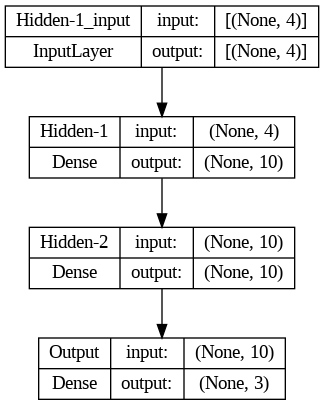

In [10]:
# 模型架構圖繪製

plot_model(model, show_shapes=True)
# plot_model(model, show_shapes=True, to_file='model.png') # 可將圖形存檔

### 編譯模型

In [11]:
# Adam優化器，功能是加快學習速度
optimizer = Adam(learning_rate=0.001)

# 編譯模型
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### 訓練

In [12]:
# 可分別測試 epach 的值 (epochs=10 100 1000)
%%time
history = model.fit(x_train, y_train, batch_size=10, epochs=200, verbose=1)


Epoch 1/200
12/12 [==============================] - 1s 3ms/step - loss: 1.1636 - accuracy: 0.3250
Epoch 2/200
12/12 [==============================] - 0s 2ms/step - loss: 1.1017 - accuracy: 0.3250
Epoch 3/200
12/12 [==============================] - 0s 2ms/step - loss: 1.0569 - accuracy: 0.3250
Epoch 4/200
12/12 [==============================] - 0s 3ms/step - loss: 1.0209 - accuracy: 0.3250
Epoch 5/200
12/12 [==============================] - 0s 2ms/step - loss: 0.9960 - accuracy: 0.3667
Epoch 6/200
12/12 [==============================] - 0s 2ms/step - loss: 0.9741 - accuracy: 0.5750
Epoch 7/200
12/12 [==============================] - 0s 2ms/step - loss: 0.9577 - accuracy: 0.5917
Epoch 8/200
12/12 [==============================] - 0s 2ms/step - loss: 0.9416 - accuracy: 0.5167
Epoch 9/200
12/12 [==============================] - 0s 2ms/step - loss: 0.9183 - accuracy: 0.4500
Epoch 10/200
12/12 [==============================] - 0s 2ms/step - loss: 0.8760 - accuracy: 0.5583
Epoch 11/

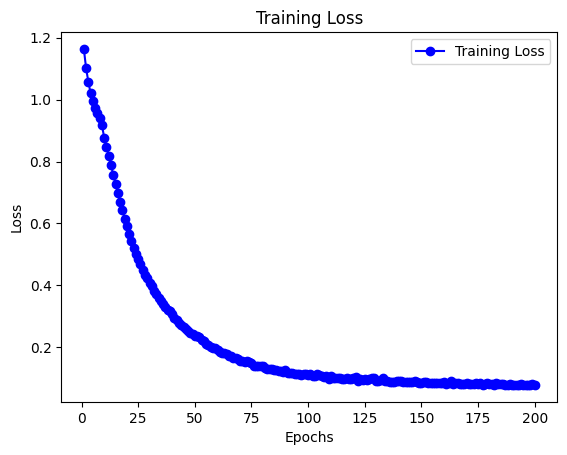

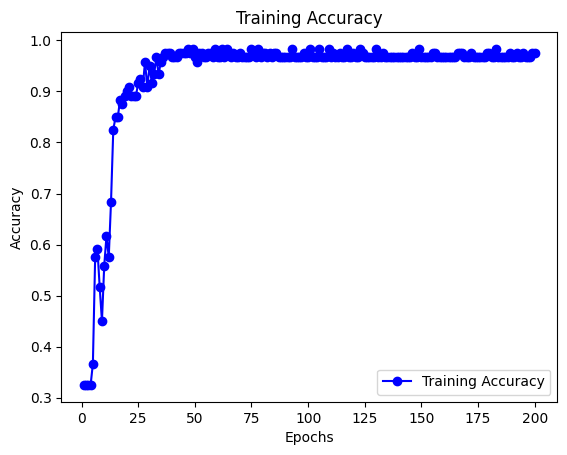

In [13]:
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt

# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 顯示訓練和正確度
accuracy = history.history["accuracy"]
epochs = range(1, len(accuracy)+1)
plt.plot(epochs, accuracy, "bo-", label="Training Accuracy")
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 儲存模型

In [14]:
# 儲存模型
model.save('MLP_iris.keras')

## 花卉品種 Test 分類預測

### 評估模型性能

In [15]:
# 使用test來做性能評估(evaluate)
results = model.evaluate(x_test, y_test)
print('評估損失 loss: {:4f}'.format(results[0]))
print('評估準確率 accuracy: {:4f}'.format(results[1]))

1/1 [==============================] - 0s 238ms/step - loss: 0.0490 - accuracy: 1.0000
評估損失 loss: 0.048956
評估準確率 accuracy: 1.000000


### 使用測試集進行預測

## 結果分析：答錯幾題呢?

In [ ]:
# predict
prediction = model.predict(x_test, batch_size=30, verbose=1)
print(prediction.shape)

# print(prediction)
p1 = np.rint(prediction)  # 根據四捨五入取整數 (非正確用法)
# print(p1)
for i in range(len(p1)):
    #print(type(y_test[i]), type(p1[i]))
    if (p1[i] == y_test[i]).all():
        pass
    else:
        print('測試集 N0.', i, ' 預測錯誤:', p1[i], '標籤:', y_test[i])

1/1 [==============================] - 0s 75ms/step
(30, 3)


### 預測相似程度 (類似信心水準)

In [ ]:
# 任意查看某個資料的結果
nn = 4
p2 = np.round(prediction, 3)
print(x_test[nn], '相似度', p2[nn], '  正確分類:', y_test[nn])

[5.2 4.1 1.5 0.1] 相似度 [0.999 0.001 0.   ]   正確分類: [1. 0. 0.]


## 總結